# Let's go watch the Fireworks

We will be filtering through the Airbnb Dataset for NSW to find the most economical suburb to book an airbnb to watch the Sydney New Year's Eve Fireworks Celebration for 2020!

Let's look at some popular vantage points around Sydney Harbour...

![ss](nye_location.png)

We shall first import some useful libraries that will come in handy for our exploration.
`imports`, we've seen this before!

In [1]:
%pylab inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sea
import descartes
import geopandas as gpd
import shapely
from shapely.geometry import Point, Polygon

Populating the interactive namespace from numpy and matplotlib


Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [3]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

In [4]:
if os.path.isfile("listings-2.csv"):
    filepath = "listings-2.csv"
    print("loading from file")
else:
    filepath = "http://insideairbnb.com/get-the-data.html/listings.csv.gz"
    print("loading from the internet")

airbnb_data = pd.read_csv(filepath)
print("done")

loading from file


/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (43,61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


done


In [5]:
airbnb_data

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11156,https://www.airbnb.com/rooms/11156,20190710033517,2019-07-11,An Oasis in the City,Very central to the city which can be reached ...,Potts Pt. is a vibrant and popular inner-city...,Very central to the city which can be reached ...,none,"It is very close to everything and everywhere,...",...,f,f,moderate,f,f,1,0,1,0,1.58
1,12351,https://www.airbnb.com/rooms/12351,20190710033517,2019-07-11,Sydney City & Harbour at the door,Come stay with Vinh & Stuart (Awarded as one o...,"We're pretty relaxed hosts, and we fully appre...",Come stay with Vinh & Stuart (Awarded as one o...,none,"Pyrmont is an inner-city village of Sydney, on...",...,f,f,strict_14_with_grace_period,t,t,2,0,2,0,4.73
2,14250,https://www.airbnb.com/rooms/14250,20190710033517,2019-07-10,Manly Harbour House,"Beautifully renovated, spacious and quiet, our...",Our home is a thirty minute walk along the sea...,"Beautifully renovated, spacious and quiet, our...",none,Balgowlah Heights is one of the most prestigio...,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.05
3,15253,https://www.airbnb.com/rooms/15253,20190710033517,2019-07-10,Stunning Penthouse Apartment In Heart Of The City,Penthouse living in a great central location: ...,"A charming two-level, two-bedroom, two-bathroo...",Penthouse living in a great central location: ...,none,The location is really central and there is nu...,...,t,f,strict_14_with_grace_period,f,f,3,2,1,0,3.60
4,20865,https://www.airbnb.com/rooms/20865,20190710033517,2019-07-11,3 BED HOUSE + 1 BED STUDIO Balmain,Hi! We are a married professional couple with ...,HOUSE : _________ * DUCTED AIR CONDITIONING IN...,Hi! We are a married professional couple with ...,none,BALMAIN is an older inner city village / subur...,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.17
5,26174,https://www.airbnb.com/rooms/26174,20190710033517,2019-07-10,"COZY PRIVATE ROOM, GREAT LOCATION!",NaN,"Double bed in decent sized bedroom, in two bed...","Double bed in decent sized bedroom, in two bed...",none,NaN,...,f,f,moderate,f,f,1,0,1,0,0.45
6,38073,https://www.airbnb.com/rooms/38073,20190710033517,2019-07-10,Modern apartment with pool and parking,"Welcome to my sanctuary - a bright, comfortabl...","Enjoy this fabulous Home away from home, and h...","Welcome to my sanctuary - a bright, comfortabl...",none,"North Sydney, on Sydney's lower North Shore, s...",...,f,f,strict_14_with_grace_period,t,t,2,1,0,1,0.60
7,39348,https://www.airbnb.com/rooms/39348,20190710033517,2019-07-10,Large Bondi studio,Fully self-contained sunny studio apartment. ...,"Sunny, studio apartment . Private terrace. bus...",Fully self-contained sunny studio apartment. ...,none,Upmarket area. Very nice and quiet neighbourho...,...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,0.67
8,44545,https://www.airbnb.com/rooms/44545,20190710033517,2019-07-10,Sunny Darlinghurst Warehouse Apartment,Sunny warehouse/loft apartment in the heart of...,"My apartment is a beautiful, simple, open plan...",Sunny warehouse/loft apartment in the heart of...,none,Darlinghurst is home to some of Sydney's best ...,...,f,f,strict_14_with_grace_period,f,t,1,1,0,0,0.56
9,57183,https://www.airbnb.com/rooms/57183,20190710033517,2019-07-10,BONDI BEACHFRONT CENTRAL LOCATION,"This large, light-filled and artistically deco...",BONDI BEACHFRONT BOHEMIAN APARTMENT Why stay a...,"This large, light-filled and artistically deco...",none,The most exciting and entertaining neighborhoo...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.24


In [6]:
city = airbnb_data[['smart_location','price','latitude','longitude']]

Let's check if the columns that we created in the subset have been accurately generated.

In [7]:
city.columns

Index(['smart_location', 'price', 'latitude', 'longitude'], dtype='object')

In [8]:
city.head()

,smart_location,price,latitude,longitude
0,"Potts Point, Australia",$65.00,-33.86917,151.22656
1,"Pyrmont, Australia","$14,316.00",-33.86515,151.19190
2,"Balgowlah, Australia",$470.00,-33.80093,151.26172
3,"Darlinghurst, Australia",$110.00,-33.88045,151.21654
4,"Balmain, Australia",$450.00,-33.85907,151.17275


So we can see that the price is displayed as a string. Although this is useful and easier to read, when it comes to analysing strings, we can't go that far.

So the next lines of code convert the strings into floats.

This will allow us to closely analyse the prices within various locations within Sydney.

These locations are called 'smart_location' in our dataset.

In [9]:
from re import sub
def str_money_to_number(row):
    if row.price[0] == "$":
        just_number = sub(r'[^\d.]', '', row.price)
        return float(just_number)
    else:
        print("errrrrr", row.price)
        return row.price

city["price_num"] = city.apply(str_money_to_number, axis=1)
city.sample(4)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,smart_location,price,latitude,longitude,price_num
36473,"Coogee, Australia",$174.00,-33.91741,151.25808,174.0
28295,"Haymarket, Australia",$150.00,-33.87914,151.20246,150.0
4393,"Sydney, Australia",$45.00,-33.89507,151.26537,45.0
15707,"Queens Park, Australia",$37.00,-33.89579,151.24612,37.0


And there we go! 

(Credits to Ben for helping me with that code)

In [10]:
city['smart_location']

0            Potts Point, Australia
1                Pyrmont, Australia
2              Balgowlah, Australia
3           Darlinghurst, Australia
4                Balmain, Australia
5          Bellevue Hill, Australia
6           North Sydney, Australia
7            North Bondi, Australia
8           Darlinghurst, Australia
9            Bondi Beach, Australia
10                Mosman, Australia
11        Bondi Junction, Australia
12           Bondi Beach, Australia
13                Avalon, Australia
14           Bondi Beach, Australia
15        Lane Cove West, Australia
16            Paddington, Australia
17          Marrickville, Australia
18           Cherrybrook, Australia
19             Narrabeen, Australia
20       Bardwell Valley, Australia
21                Sydney, Australia
22           Bondi Beach, Australia
23               Pyrmont, Australia
24                Coogee, Australia
25               Malabar, Australia
26                Sydney, Australia
27           Neutral Bay, Au

In [11]:
#city['smart_location'].hist()

So before we create a histogram, let's check out how many locations there are...

In [12]:
city.count()

smart_location    38080
price             38080
latitude          38080
longitude         38080
price_num         38080
dtype: int64

It's good we didn't run the code, as the number of values would've taken ages to process!

In [13]:
city.price_num.min()

0.0

In [14]:
city.price_num.max()

36128.0

In [15]:
city.price_num.mean()

205.80832457983195

In [16]:
city.price_num.median()

130.0

In [44]:
kensington = city[city.smart_location == 'Kensington, Australia']
sydney = city[city.smart_location == 'Sydney, Australia']
cremorne = city[city.smart_location == 'Cremorne Point, Australia']
kirribilli = city[city.smart_location == 'Kirribilli, Australia']
birchgrove = city[city.smart_location == 'Birchgrove, Australia']
greenwich = city[city.smart_location == 'Greenwich, Australia']
shark = city[city.smart_location == 'Shark Island, Australia']

In [18]:
sydney.sample()

,smart_location,price,latitude,longitude,price_num
2856,"Sydney, Australia",$99.00,-33.72535,151.11599,99.0


In [19]:
cremorne.sample()

,smart_location,price,latitude,longitude,price_num
15523,"Cremorne Point, Australia",$500.00,-33.83746,151.22465,500.0


In [20]:
kirribilli.sample()

,smart_location,price,latitude,longitude,price_num
28357,"Kirribilli, Australia","$5,000.00",-33.85005,151.21882,5000.0


In [21]:
birchgrove.sample()

,smart_location,price,latitude,longitude,price_num
7970,"Birchgrove, Australia",$233.00,-33.8515,151.17794,233.0


In [22]:
greenwich.sample()

,smart_location,price,latitude,longitude,price_num
17089,"Greenwich, Australia","$1,099.00",-33.82269,151.18199,1099.0


In [23]:
shark

,smart_location,price,latitude,longitude,price_num


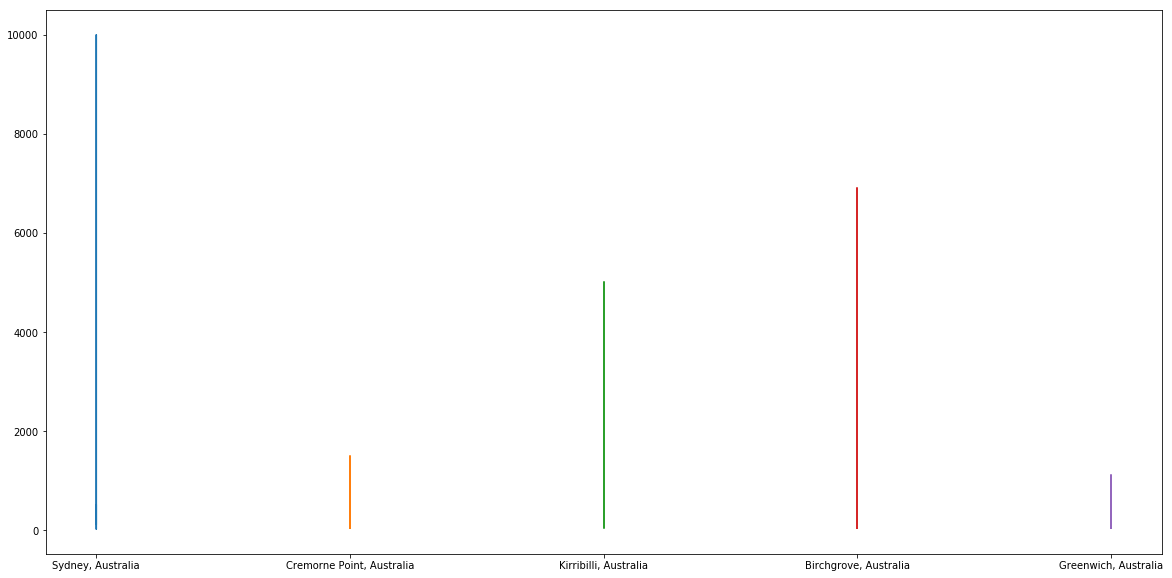

In [24]:
plt.plot(sydney.smart_location,sydney.price_num)
plt.plot(cremorne.smart_location,cremorne.price_num)
plt.plot(kirribilli.smart_location,kirribilli.price_num)
plt.plot(birchgrove.smart_location,birchgrove.price_num)
plt.plot(greenwich.smart_location,greenwich.price_num)
plt.plot(shark.smart_location,shark.price_num)
plt.show()

Now let's sort the locations by their mean locations and prices.
We are making an assumption here but for the purpose of this analysis, let's just go with it!

In [25]:
sorted_city = city.groupby('smart_location').mean()
sorted_city.sample()

,latitude,longitude,price_num
smart_location,,,
"Linley Point, Australia",-33.827257,151.148344,190.0


In [26]:
sorted_city["price_num"].value_counts()

50.000000     12
110.000000     9
85.000000      9
150.000000     8
125.000000     8
99.000000      8
89.000000      8
120.000000     8
81.000000      8
249.000000     8
71.000000      7
300.000000     6
45.000000      6
61.000000      6
160.000000     5
140.000000     5
65.000000      5
40.000000      5
130.000000     5
500.000000     4
200.000000     4
75.000000      4
58.000000      4
62.500000      3
230.000000     3
251.000000     3
105.000000     3
174.000000     3
395.000000     3
220.000000     3
              ..
540.000000     1
100.500000     1
700.000000     1
366.000000     1
306.575000     1
163.714286     1
227.000000     1
133.777778     1
234.611111     1
77.318182      1
199.000000     1
183.086957     1
299.375000     1
146.700000     1
438.111111     1
81.594595      1
223.000000     1
127.500000     1
199.479769     1
187.000000     1
152.304274     1
143.000000     1
102.500000     1
274.356183     1
222.025862     1
113.516854     1
224.068182     1
160.133333    

In [27]:
mean_sorted_city= sorted_city.mean()
mean_sorted_city.head()

latitude     -33.849449
longitude    151.100208
price_num    193.366863
dtype: float64

''

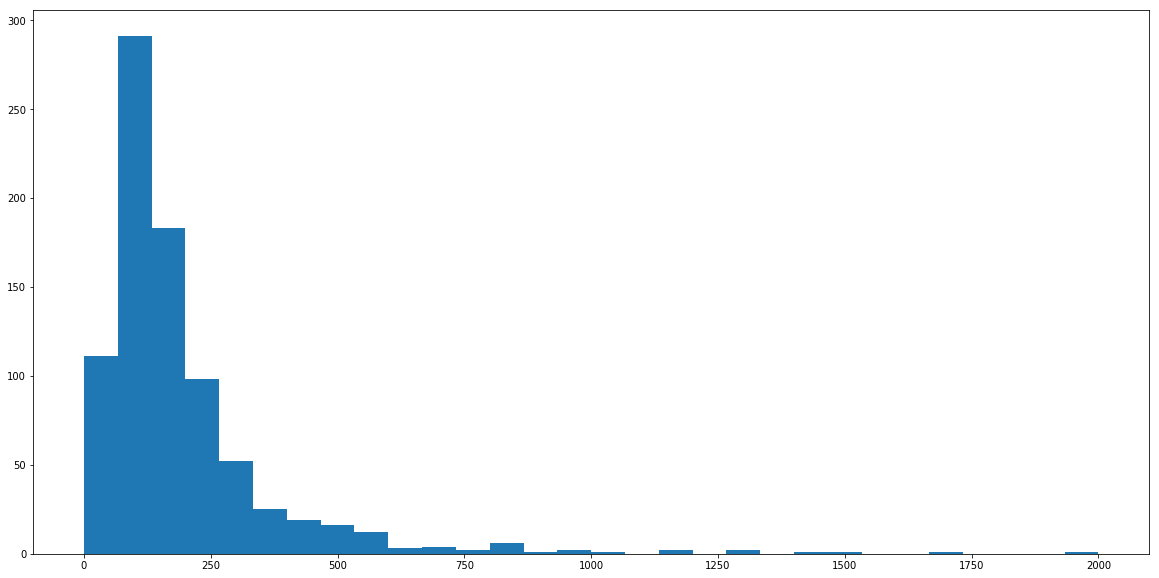

In [28]:
hist(sorted_city['price_num'], bins=30)
;

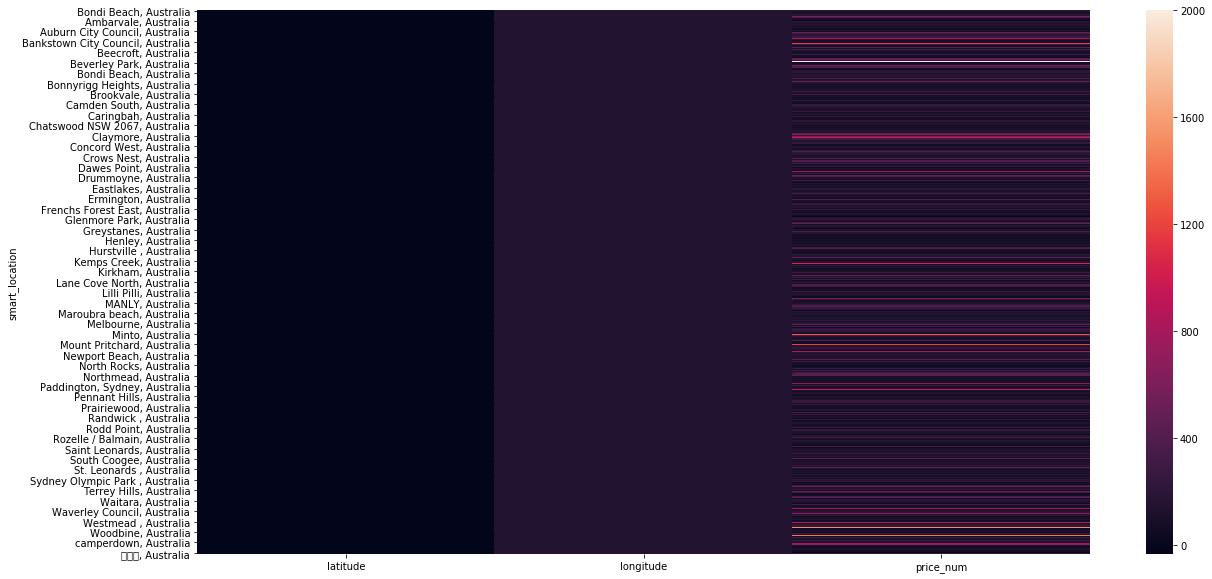

In [29]:
sea.heatmap(sorted_city)

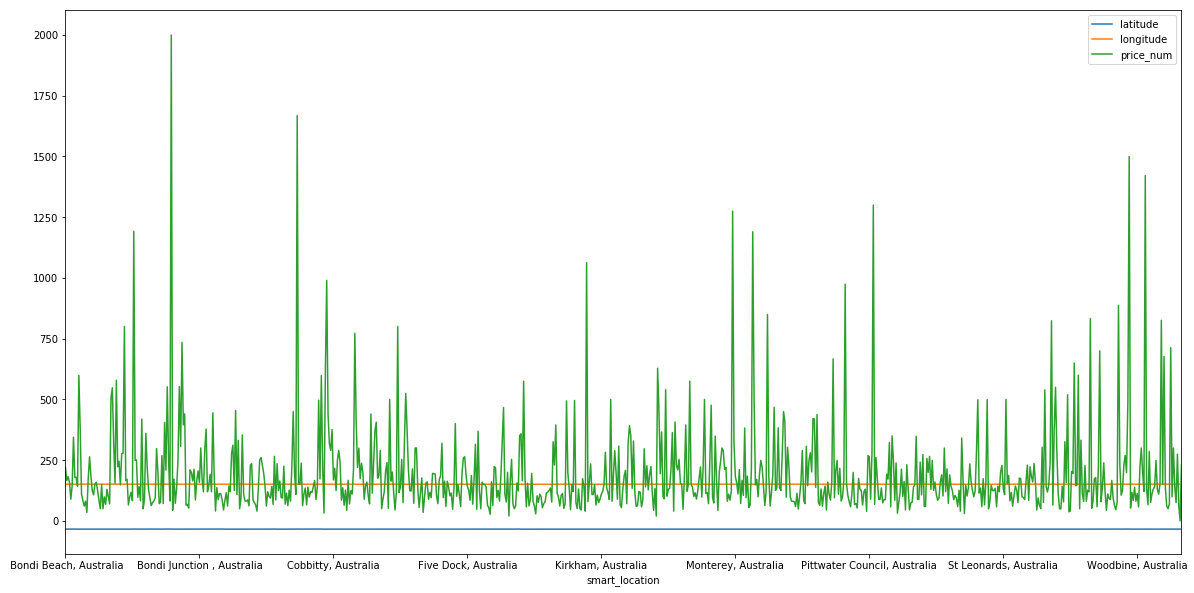

In [30]:
sorted_city.plot()

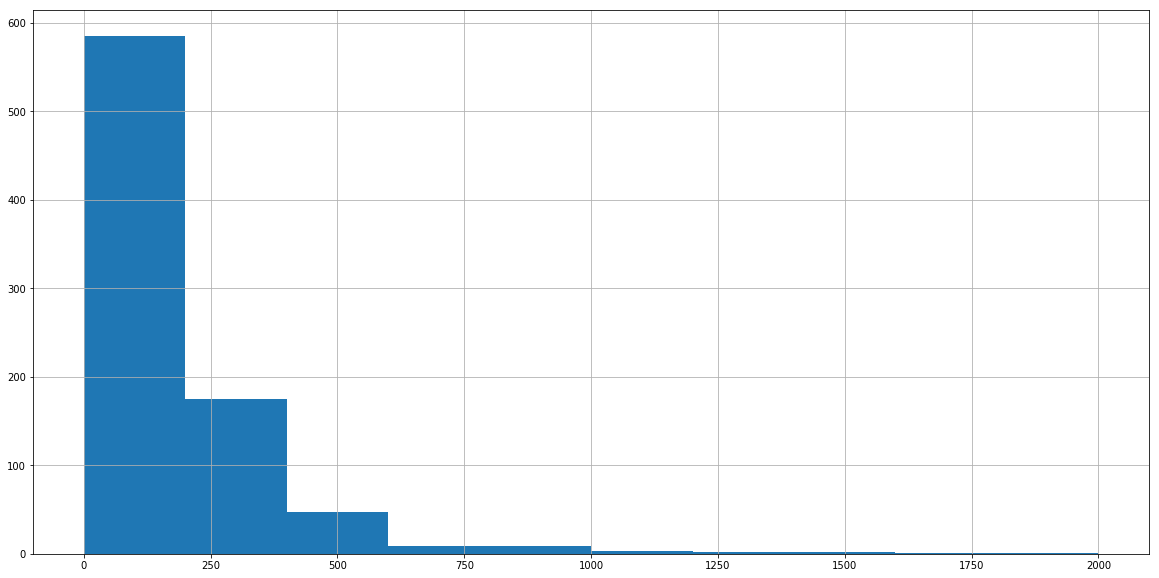

In [31]:
sorted_city['price_num'].hist()

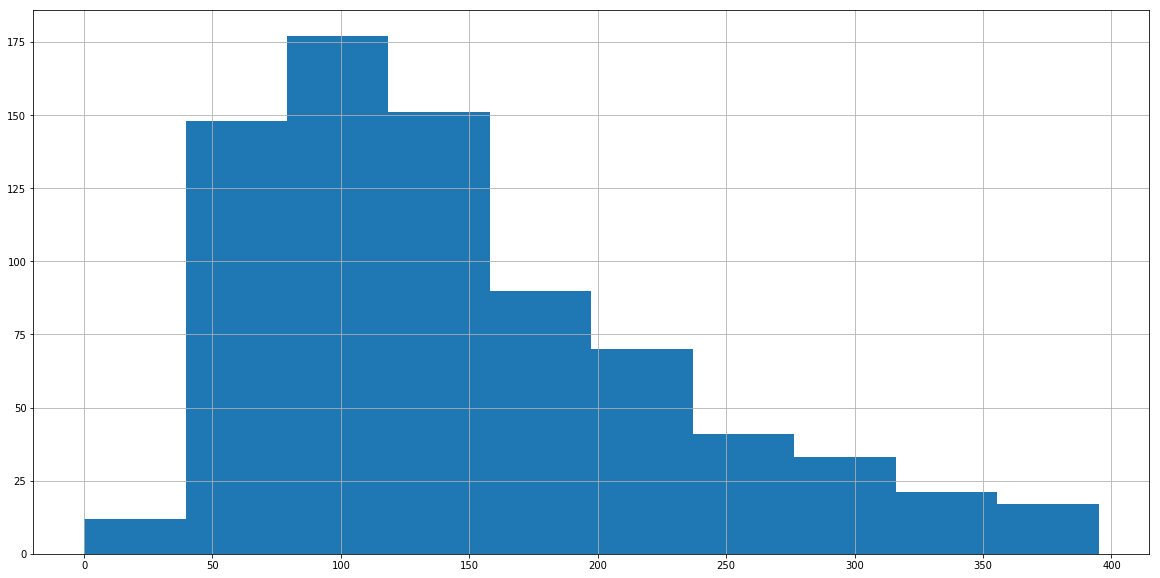

In [32]:
sorted_city['price_num'][sorted_city['price_num']<400].hist()

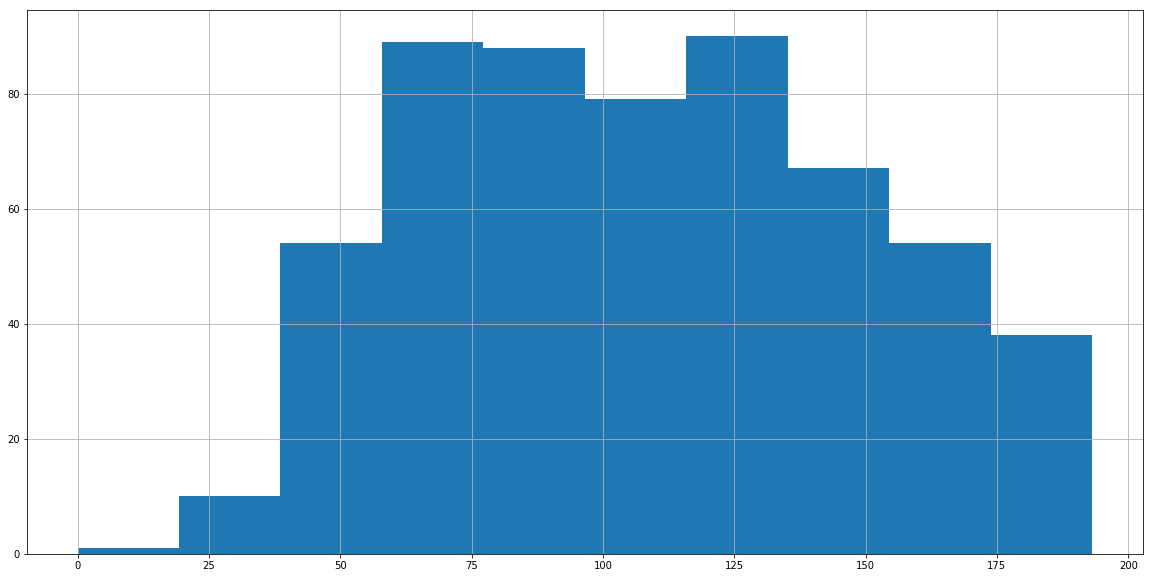

In [33]:
sorted_city['price_num'][sorted_city['price_num']<194].hist()

So Let's take a random suburb and see how many entries there are for it.

In [34]:
super_sorted_city = sorted_city[sorted_city['price_num']>194 ]
super_sorted_city.head()

,latitude,longitude,price_num
smart_location,,,
"Bondi Beach, Australia",-33.882980,151.272040,220.000000
"Acacia Gardens, Australia",-33.730880,150.913885,344.500000
"Allambie Heights , Australia",-33.776410,151.256580,599.000000
"Allambie Heights, Australia",-33.769543,151.255403,380.774194
"Annangrove, Australia",-33.669468,150.961150,264.000000


In [35]:
sub_sorted_city = sorted_city[sorted_city['price_num']<194]
sub_sorted_city.head()

,latitude,longitude,price_num
smart_location,,,
"Coogee ,Sydney, Australia",-33.917210,151.257920,166.000000
"Neutral Bay, Australia",-33.831810,151.214705,182.000000
"AU, Australia",-33.900090,151.155360,158.750000
"Abbotsbury, Australia",-33.870710,150.860250,89.000000
"Abbotsford, Australia",-33.850157,151.130252,144.636364


(-33.4, -34.1)

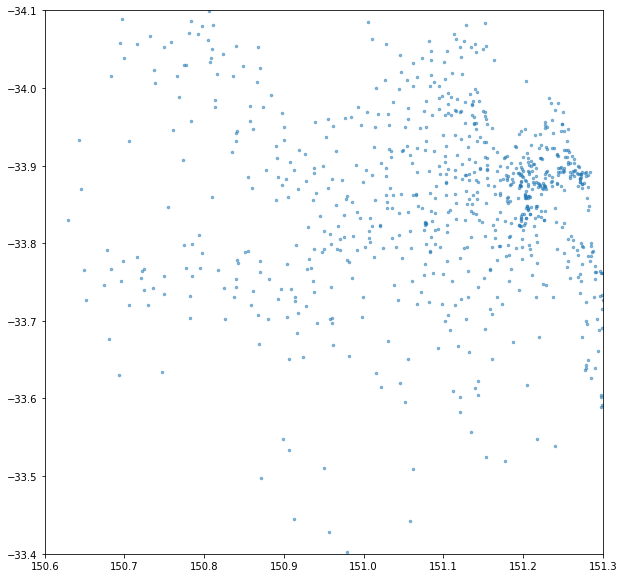

In [36]:
figure(figsize=(10,10))
sorted_plot = plot(sorted_city['longitude'],sorted_city['latitude'], '.', ms=5,alpha=0.5)
#sub_sorted_plot = plot(sub_sorted_city['longitude'],sub_sorted_city['latitude'], '.', ms=10,alpha=0.5)
#super_sorted_plot = plot(super_sorted_city['longitude'],super_sorted_city['latitude'], '.', ms=15,alpha=0.5)
xlim(150.6,151.3)
ylim(-33.4,-34.1)
#NSW

(-33.4, -34.1)

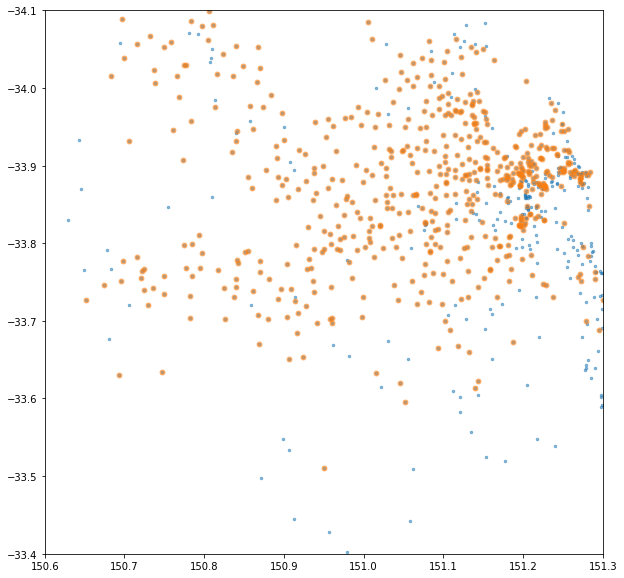

In [37]:
figure(figsize=(10,10))
sorted_plot = plot(sorted_city['longitude'],sorted_city['latitude'], '.', ms=5,alpha=0.5)
sub_sorted_plot = plot(sub_sorted_city['longitude'],sub_sorted_city['latitude'], '.', ms=10,alpha=0.5)
#super_sorted_plot = plot(super_sorted_city['longitude'],super_sorted_city['latitude'], '.', ms=15,alpha=0.5)
xlim(150.6,151.3)
ylim(-33.4,-34.1)

(-34.4, -33.1)

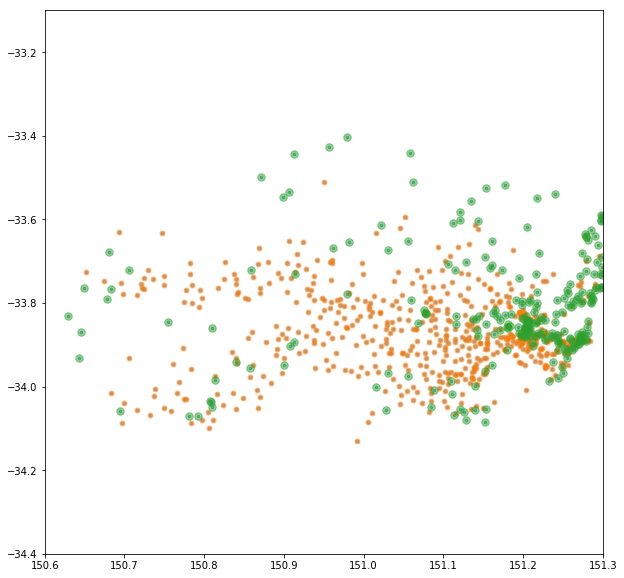

In [38]:
figure(figsize=(10,10))
sorted_plot = plot(sorted_city['longitude'],sorted_city['latitude'], '.', ms=5,alpha=0.5)
sub_sorted_plot = plot(sub_sorted_city['longitude'],sub_sorted_city['latitude'], '.', ms=10,alpha=0.5)
super_sorted_plot = plot(super_sorted_city['longitude'],super_sorted_city['latitude'], '.', ms=15,alpha=0.5)
xlim(150.6,151.3)
ylim(-34.4,-33.1)

![ss](nsw_overlay.png)

(-33.8818, -33.854)

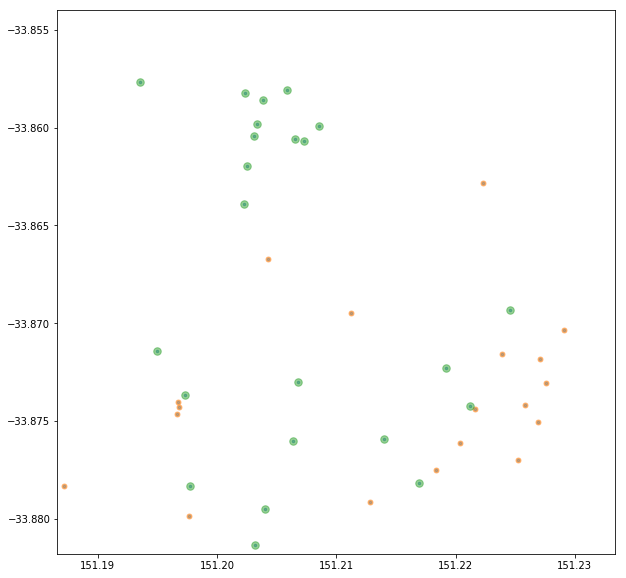

In [39]:
figure(figsize=(10,10))
sorted_plot = plot(sorted_city['longitude'],sorted_city['latitude'], '.', ms=5,alpha=0.5)
sub_sorted_plot = plot(sub_sorted_city['longitude'],sub_sorted_city['latitude'], '.', ms=10,alpha=0.5)
super_sorted_plot = plot(super_sorted_city['longitude'],super_sorted_city['latitude'], '.', ms=15,alpha=0.5)
xlim(151.1866,151.2334)
ylim(-33.8818,-33.8540)
#sydney

![sss](sydney_overlay.png)

(-33.8357, -33.8189)

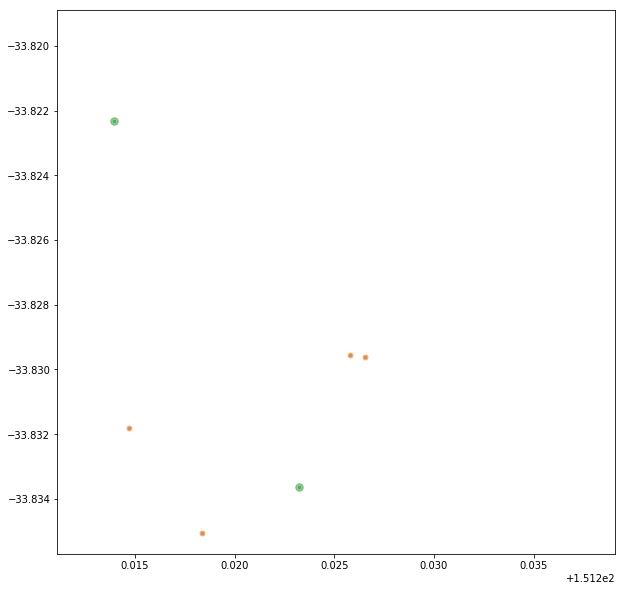

In [40]:
figure(figsize=(10,10))
sorted_plot = plot(sorted_city['longitude'],sorted_city['latitude'], '.', ms=5,alpha=0.5)
sub_sorted_plot = plot(sub_sorted_city['longitude'],sub_sorted_city['latitude'], '.', ms=10,alpha=0.5)
super_sorted_plot = plot(super_sorted_city['longitude'],super_sorted_city['latitude'], '.', ms=15,alpha=0.5)
xlim(151.2111,151.2391)
ylim(-33.8357,-33.8189)
#cremorne

![ss](cremorne_overlay.png)

(-33.8619, -33.8331)

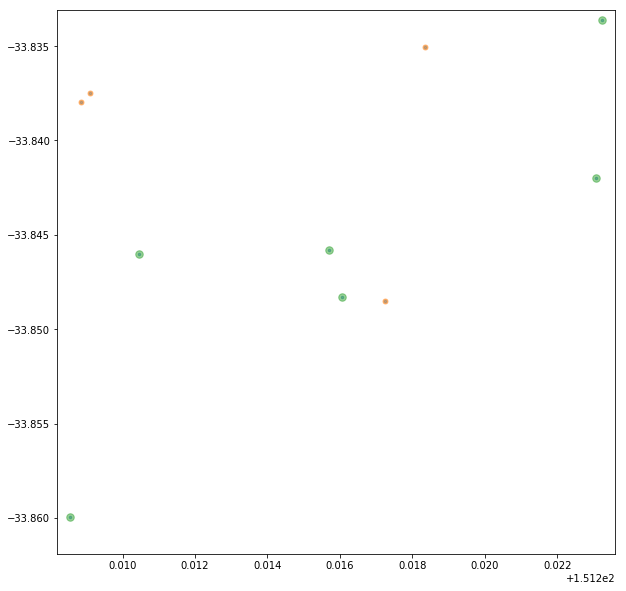

In [41]:
figure(figsize=(10,10))
sorted_plot = plot(sorted_city['longitude'],sorted_city['latitude'], '.', ms=5,alpha=0.5)
sub_sorted_plot = plot(sub_sorted_city['longitude'],sub_sorted_city['latitude'], '.', ms=10,alpha=0.5)
super_sorted_plot = plot(super_sorted_city['longitude'],super_sorted_city['latitude'], '.', ms=15,alpha=0.5)
xlim(151.2082,151.2236)
ylim(-33.8619,-33.8331)
#kirribilli

![ss](kirribilli_overlay.png)

(-33.8551, -33.8465)

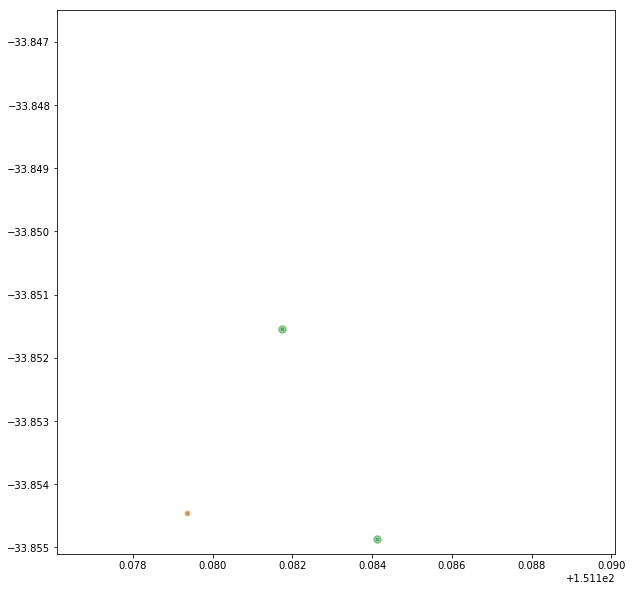

In [42]:
figure(figsize=(10,10))
sorted_plot = plot(sorted_city['longitude'],sorted_city['latitude'], '.', ms=5,alpha=0.5)
sub_sorted_plot = plot(sub_sorted_city['longitude'],sub_sorted_city['latitude'], '.', ms=10,alpha=0.5)
super_sorted_plot = plot(super_sorted_city['longitude'],super_sorted_city['latitude'], '.', ms=15,alpha=0.5)
xlim(151.1761,151.1901)
ylim(-33.8551,-33.8465)
#birchgrove

![ss](birchgrove_overlay.png)

(-33.8386, -33.8214)

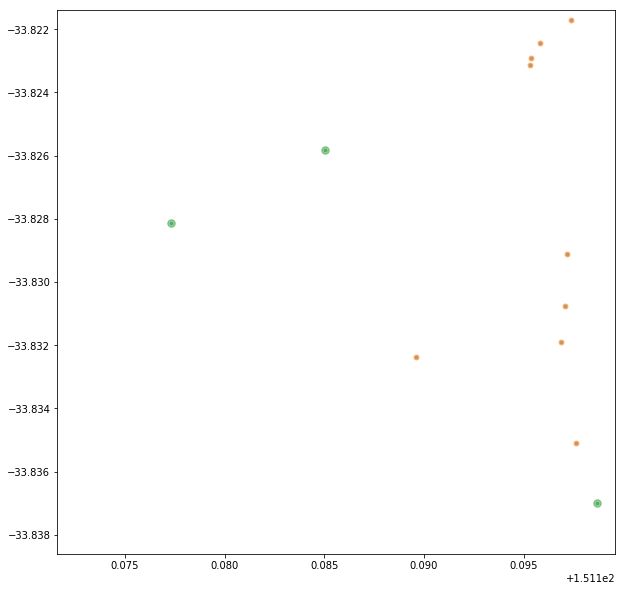

In [43]:
figure(figsize=(10,10))
sorted_plot = plot(sorted_city['longitude'],sorted_city['latitude'], '.', ms=5,alpha=0.5)
sub_sorted_plot = plot(sub_sorted_city['longitude'],sub_sorted_city['latitude'], '.', ms=10,alpha=0.5)
super_sorted_plot = plot(super_sorted_city['longitude'],super_sorted_city['latitude'], '.', ms=15,alpha=0.5)
xlim(151.1716,151.1996)
ylim(-33.8386,-33.8214)
#greenwich

![ss](greenwich_overlay.png)

![ss](final_overlay.png)

# #NYE2020

So now I want to write a bit of code that takes an average price for each suburb in sydney and give a price for it. So instead of a smart_location, I want to create another column that has the average price for each location.

Organise it in accending order to see which one has the highest price.

In addition to this, use seaborn to create a plot that has the same colour circle for the same suburb, but the size of the circle is dependent on the price. There will be 3 values, the longitude, latitude and the price.

To simplify the process you can use the average as discussed above.

Take the average of the longitude and latitude to pinpoint the location.
